In [1]:
# Questions to answer:
#     - how many encyclicals each pope wrote
#         -- ...per year of pontificate 
#     - what whas average length of it
#     - term frequency of words for each pope
#         -- possbly put the top words on a line (aka stream graph)
#     - ...?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from helper_funs import *

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 7]
# retrieve selected popes names
with open("pickles/selected_popes_names", "rb") as fp:   # Unpickling
    popes = pickle.load(fp)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wmasl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Get all texts to one df

In [5]:
df = get_df_of_enc(pope = 'all')
df

,popes,enc_title,enc_date,enc_text,enc_file
0,Francis,fratelli_tutti,20201003,\n\n\n\n\n\n\nENCYCLICAL LETTER FRATELLI TUTTI...,enc_fratelli_tutti_20201003.txt
1,Francis,laudato_si,20150524,\n\n\n\n\n\n\nENCYCLICAL LETTER LAUDATO SI’ ...,enc_laudato_si_20150524.txt
2,Francis,lumen_fidei,20130629,\n\n\n\n\n\n\n\n\n\n \n DOWNLOAD PDF\n\n\...,enc_lumen_fidei_20130629.txt
3,Benedict XVI,caritas_in_veritate,20090629,\n\n\n\n\n\n\nENCYCLICAL LETTER CARITAS IN VER...,enc_caritas_in_veritate_20090629.txt
4,Benedict XVI,deus_caritas_est,20051225,\n\n\n\n\n\n\nENCYCLICAL LETTER DEUS CARITAS ...,enc_deus_caritas_est_20051225.txt
...,...,...,...,...,...
208,Leo XIII,superiore_anno,30081884,\n\n\n\n\n\n\nSUPERIORE ANNOENCYCLICAL OF POPE...,enc_superiore_anno_30081884.txt
209,Leo XIII,supremi_apostolatus_officio,01091883,\n\n\n\n\n\n\nSUPREMIAPOSTOLATUS OFFICIOENCYCL...,enc_supremi_apostolatus_officio_01091883.txt
210,Leo XIII,tametsi_futura_prospicientibus,01111900,\n\n\n\n\n\n\n TAMETSI FUTURA PROSPICIENTIBU...,enc_tametsi_futura_prospicientibus_01111900.txt
211,Leo XIII,urbanitatis_veteris,20111901,\n\n\n\n\n\n\n \nURBANITATIS VETERISENCYCLICAL...,enc_urbanitatis_veteris_20111901.txt


## Number of encyclicals per pope

Text(0.5, 1.0, 'Number of encyclicals')

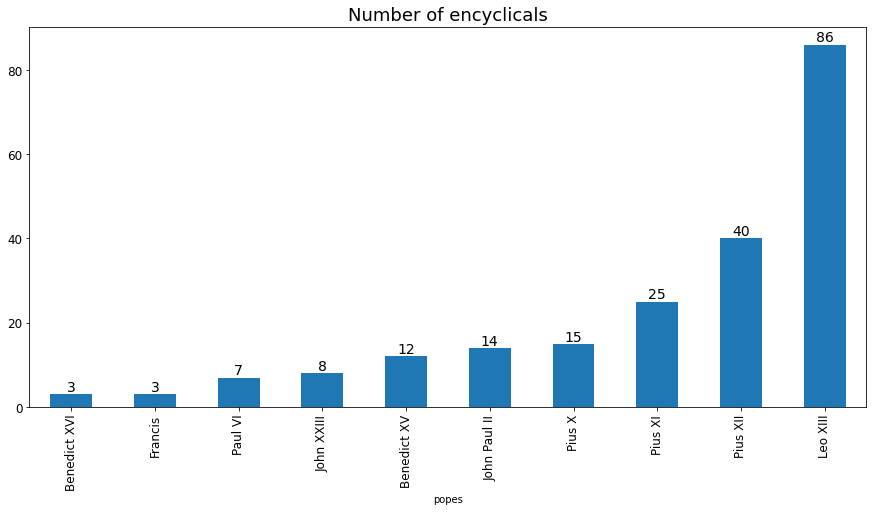

In [7]:
# how many encyclicals each pope wrote
ax = df.groupby('popes').count().reset_index().sort_values('enc_file').plot.bar(x = 'popes',y = 'enc_title',fontsize = 12)
ax.get_legend().remove()
ax.bar_label(ax.containers[0],fontsize = 14)
plt.title('Number of encyclicals',{'fontsize':18})

## Average length of encyclical per pope

Text(0.5, 1.0, 'Average number of characters in encyclical (without special special chars)')

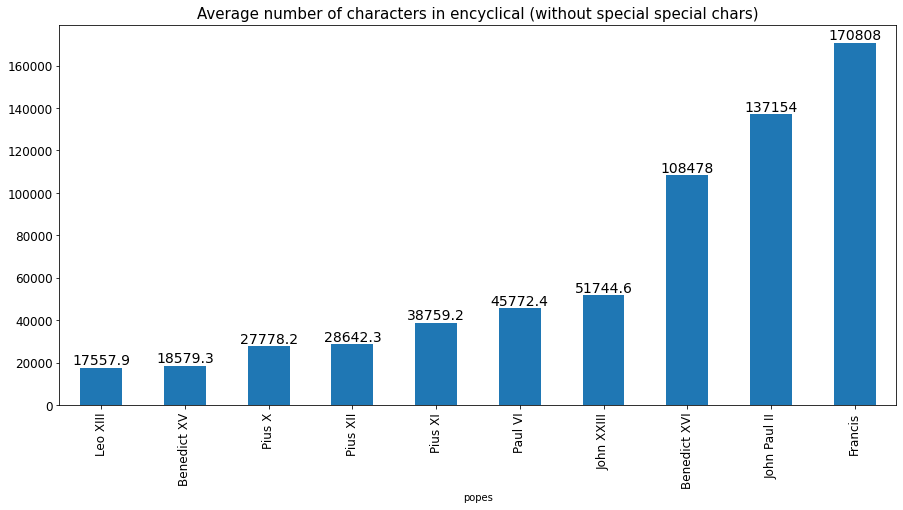

In [8]:
# what whas average length of it
df_avg_length = df.copy()

df_avg_length['enc_text'] = df['enc_text'].apply(lambda x: re.sub('\s+','',x))

ax = df_avg_length.groupby('popes')['enc_text'
                                   ].apply(lambda x: np.mean(x.str.len())
                                          ).reset_index(name='mean_len_text'
                                                       ).sort_values('mean_len_text'
                                                                    ).plot.bar(x = 'popes', y = 'mean_len_text',fontsize = 12)
ax.get_legend().remove()
ax.bar_label(ax.containers[0],fontsize = 14)
plt.title('Average number of characters in encyclical (without special special chars)',{'fontsize':15})

## Most common words used by each pope

In [9]:
# term frequency of words for each pope
df_merged = get_df_of_merged_enc()
df_merged

,popes,enc_file,enc_text
0,Francis,Francis_encyclicals.txt,\n\n\n\n\n\n\nENCYCLICAL LETTER FRATELLI TUTTI...
1,Benedict XVI,Benedict XVI_encyclicals.txt,\n\n\n\n\n\n\nENCYCLICAL LETTER CARITAS IN VER...
2,John Paul II,John Paul II_encyclicals.txt,\n\n\n\n\n JOHN PAUL II HOLY FATHER « CENTE...
3,Paul VI,Paul VI_encyclicals.txt,\n\n\n\n\n\n CHRISTI MATRI \nENCYCLICAL OF ...
4,John XXIII,John XXIII_encyclicals.txt,\n\n\n\n\n\n\n AD PETRI CATHEDRAM \nENCYCLI...
5,Pius XII,Pius XII_encyclicals.txt,\n\n\n\n\n\n\n AD APOSTOLORUM PRINCIPIS \n ...
6,Pius XI,Pius XI_encyclicals.txt,\n\n\n\n\n\n\n ACERBA ANIMI ENCYCLICAL OF PO...
7,Benedict XV,Benedict XV_encyclicals.txt,\n\n\n\n\n\n\n \n\nAD BEATISSIMI APOSTOLORUM ...
8,Pius X,Pius X_encyclicals.txt,\n\n\n\n\n\n\n ACERBO NIMIS \n\nENCYCLICAL OF...
9,Leo XIII,Leo XIII_encyclicals.txt,\n\n\n\n\n\n\nADIUTRICEMENCYCLICAL OF POPE LEO...


In [17]:
add_stopwords = ['loc','cit','cf','ibid','aas','tps',
                 'editrice','copyright', 'libreria', 
                 'vaticana','l','osservatore', 'romano',
                'download','pdf', 'ibdem', 'venerable', 'brethen',
                'epist','ad','id']

add_characters_to_clean = ['“','’','”','©']

# save these lists
with open("pickles/add_stopwords", "wb") as fp:   #Pickling
    pickle.dump(add_stopwords, fp)
    
with open("pickles/add_characters_to_clean", "wb") as fp:   #Pickling
    pickle.dump(add_characters_to_clean, fp) 


def print_top_k_n_grams(pope,N = 1 , k = 5):
    text = df_merged[df_merged['popes'] == pope].iloc[0]['enc_text']
    text_proc = preprocess_text(text,True,True,True, add_chars_to_clean = add_characters_to_clean , add_stopwords = add_stopwords)
    top = get_top_k_ngrams(text_proc,k = 5,n=N,freq =True)
    top_df = pd.DataFrame(top, columns = ['phrase','freq'])
    top_df['freq'] = top_df['freq']
    #top_df = top_df.style.format({'freq': '{:,.2%}'.format})
    top_df.style.format({'freq': '{:,.2%}'.format})
    print(f'Top {N}-grams for pope {pope} are:\n')
    display(top_df.style.format({'freq': '{:,.2%}'.format}))
    print('')

In [18]:
for pope in popes:
    print_top_k_n_grams(pope,N = 2)

Top 2-grams for pope Francis are:



,phrase,freq
0,"('can', 'not')",0.23%
1,"('encyclical', 'letter')",0.17%
2,"('human', 'beings')",0.14%
3,"('common', 'good')",0.14%
4,"('brothers', 'sisters')",0.08%



Top 2-grams for pope Benedict XVI are:



,phrase,freq
0,"('encyclical', 'letter')",0.26%
1,"('can', 'not')",0.24%
2,"('paul', 'vi')",0.19%
3,"('john', 'paul')",0.18%
4,"('paul', 'ii')",0.17%



Top 2-grams for pope John Paul II are:



,phrase,freq
0,"('holy', 'spirit')",0.27%
1,"('second', 'vatican')",0.22%
2,"('ecumenical', 'council')",0.14%
3,"('can', 'not')",0.13%
4,"('vatican', 'ecumenical')",0.13%



Top 2-grams for pope Paul VI are:



,phrase,freq
0,"('can', 'not')",0.18%
1,"('vatican', 'council')",0.11%
2,"('second', 'vatican')",0.10%
3,"('constitution', 'church')",0.09%
4,"('world', 'today')",0.09%



Top 2-grams for pope John XXIII are:



,phrase,freq
0,"('common', 'good')",0.18%
1,"('can', 'not')",0.15%
2,"('encyclical', 'letter')",0.15%
3,"('pius', 'xii')",0.12%
4,"('pius', 'xiis')",0.12%



Top 2-grams for pope Pius XII are:



,phrase,freq
0,"('jesus', 'christ')",0.20%
1,"('can', 'not')",0.13%
2,"('apostolic', 'see')",0.11%
3,"('divine', 'redeemer')",0.10%
4,"('mystical', 'body')",0.09%



Top 2-grams for pope Pius XI are:



,phrase,freq
0,"('can', 'not')",0.19%
1,"('catholic', 'action')",0.14%
2,"('jesus', 'christ')",0.13%
3,"('human', 'society')",0.07%
4,"('st', 'francis')",0.06%



Top 2-grams for pope Benedict XV are:



,phrase,freq
0,"('jesus', 'christ')",0.18%
1,"('apostolic', 'see')",0.14%
2,"('can', 'not')",0.13%
3,"('benedict', 'xv')",0.11%
4,"('holy', 'scripture')",0.09%



Top 2-grams for pope Pius X are:



,phrase,freq
0,"('jesus', 'christ')",0.13%
1,"('can', 'not')",0.12%
2,"('apostolic', 'see')",0.11%
3,"('religious', 'sentiment')",0.05%
4,"('catholic', 'action')",0.05%



Top 2-grams for pope Leo XIII are:



,phrase,freq
0,"('jesus', 'christ')",0.16%
1,"('can', 'not')",0.14%
2,"('leo', 'xiii')",0.10%
3,"('apostolic', 'see')",0.09%
4,"('catholic', 'faith')",0.06%
